In [62]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [63]:
#加载数据
data = genfromtxt(r"Delivery.csv",delimiter=',')
print(data)

[[100.    4.    9.3]
 [ 50.    3.    4.8]
 [100.    4.    8.9]
 [100.    2.    6.5]
 [ 50.    2.    4.2]
 [ 80.    2.    6.2]
 [ 75.    3.    7.4]
 [ 65.    4.    6. ]
 [ 90.    3.    7.6]
 [ 90.    2.    6.1]]


In [64]:
#切分数据
x_data = data[:,:-1]
y_data = data[:,-1]
print(x_data)
print(y_data)

[[100.   4.]
 [ 50.   3.]
 [100.   4.]
 [100.   2.]
 [ 50.   2.]
 [ 80.   2.]
 [ 75.   3.]
 [ 65.   4.]
 [ 90.   3.]
 [ 90.   2.]]
[9.3 4.8 8.9 6.5 4.2 6.2 7.4 6.  7.6 6.1]


In [79]:
#学习率
lr = 0.0001
#参数
theta0 = 0
theta1 = 0
theta2 = 0

#最大迭代次数
epochs = 1000

#最小二乘法

def compute_error(theta0,theta1,theta2,x_data,y_data):
    totalerror = 0
    for i in range(len(0,x_data)):
        totalerror += (y_data[i] - (theta1*x_data[i,0] - theta2*x_data[i,1] + theta0))**2
    return totalerror/float(len(x_data))

#梯度下降法
def gradient_descent_method(x_data,y_data,theta0,theta1,theta2,lr,epochs):
    #计算总的数据量
    m = float(len(x_data))
    
    for i in range(epochs):
        theta0_grad = 0
        theta1_grad = 0
        theta2_grad = 0
        #计算求和，然后计算平均
        for j in range(0,len(x_data)):
            theta0_grad += (1/m)*(y_data[j] - (theta1*x_data[j,0] + theta2*x_data[j,1] + theta0))
            theta1_grad += (1/m)*(y_data[j] - (theta1*x_data[j,0] + theta2*x_data[j,1] + theta0))*x_data[j,0]
            theta2_grad += (1/m)*(y_data[j] - (theta1*x_data[j,0] + theta2*x_data[j,1] + theta0))*x_data[j,1]
        #更新参数
        
        theta0  = theta0 - lr*theta0_grad
        theta1  = theta1 - lr*theta1_grad
        theta2  = theta2 - lr*theta2_grad
    return theta0,theta1,theta2  
        

In [80]:
theta0,theta1,theta2 = gradient_descent_method(x_data,y_data,theta0,theta1,theta2,lr,epochs)
print("after {0} iterations theta0 = {1} theta1 = {2} theta2 = {3}".format(epochs,theta0,theta1,theta2))

after 1000 iterations theta0 = -1.298633992544752e+221 theta1 = -1.094846092908564e+223 theta2 = -3.806952720058741e+221


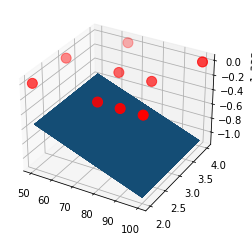

In [81]:
ax = plt.figure().add_subplot(111,projection = '3d')
ax.scatter(x_data[:,0],x_data[:,1],y_data, c = 'r',marker = 'o',s = 100)
x0 = x_data[:,0]
x1 = x_data[:,1]

x0,x1 = np.meshgrid(x0,x1)
z = theta0 + theta1*x0 + theta2*x1

ax.plot_surface(x0,x1,z)

plt.show()